# Øvelse 3

Lav data analyse på jeres egne data og projekt.
Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.
For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest histogrammer og lignende, som giver mening – det er helt o.k.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
#dataset = np.loadtxt('..\ks-projects-201801.csv', delimiter=',', skiprows=1)
dataset = pd.read_csv('..\ks-projects-201801.csv', delimiter=',')


In [2]:

testData = dataset
#dataset.info()
print(len(testData))
print(testData.size)

timedelta = (pd.to_datetime(testData["deadline"])-pd.to_datetime(testData["launched"]))

timedelta = timedelta.dt.days+timedelta.dt.seconds/(24*60*60)
testData["timedelta"]= timedelta

testData.head()

378661
5679915


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,timedelta
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58.491343
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59.802813
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44.985532
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29.858206
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55.642326


In [3]:
testData["state"].value_counts()



#failed = 0
#success = 1
#testData = testData[(testData.state != "canceled") & (testData.state != "live") & (testData.state != "live")]
testData = testData[(testData.state == "successful") | (testData.state == "failed")]



In [4]:
testData = testData.assign(outcome=(testData["state"] == "successful").astype(int))

In [5]:
tsuccess = testData[(testData.country=="N,0\"")]
tsuccess.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timedelta,outcome
count,2.100000e+02,2.100000e+02,2.100000e+02,210.0,0.0,2.100000e+02,2.100000e+02,210.000000,210.000000
mean,1.045959e+09,2.125934e+04,1.577108e+04,0.0,NaN,1.556350e+04,2.068022e+04,31.741609,0.500000
std,6.096604e+08,1.573463e+05,1.904838e+05,0.0,NaN,1.904870e+05,1.573042e+05,11.339640,0.501195
min,1.326050e+07,7.200000e+02,0.000000e+00,0.0,NaN,0.000000e+00,1.037420e+03,3.491343,0.000000
25%,5.516922e+08,2.500000e+03,5.009750e+01,0.0,NaN,5.323250e+01,2.297115e+03,29.144719,0.000000
50%,1.035200e+09,4.000000e+03,1.500000e+03,0.0,NaN,1.507500e+03,4.000000e+03,29.512454,0.500000
75%,1.574108e+09,6.000000e+03,4.007750e+03,0.0,NaN,4.121000e+03,5.609470e+03,31.017697,1.000000
max,2.143888e+09,1.877000e+06,2.762572e+06,0.0,NaN,2.762572e+06,1.877000e+06,59.999850,1.000000


In [6]:
testData = testData[(testData.country != "N,0\"")]
testData = testData.drop(columns=["usd pledged","goal","pledged","currency","ID","state","name"])

In [7]:

#testData["state"] = testData["state"].astype(int)
#testData.state = pd.to_numeric(testData.state)

testData.head()
#testData["state"].value_counts()

,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,timedelta,outcome
0,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,58.491343,0
1,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,59.802813,0
2,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,44.985532,0
3,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,29.858206,0
5,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,224,US,52375.0,50000.00,34.431632,1


In [8]:
from pandas.plotting import scatter_matrix
attributes = ["timedelta", "outcome", "usd_pledged_real","usd_goal_real","backers"]

#scatter_matrix(testData[attributes], figsize=(16, 16))

In [9]:
testData.describe()


,backers,usd_pledged_real,usd_goal_real,timedelta,outcome
count,331465.000000,3.314650e+05,3.314650e+05,331465.000000,331465.000000
mean,116.455315,9.939901e+03,4.152320e+04,33.390422,0.403816
std,965.728598,9.664517e+04,1.109274e+06,12.724162,0.490662
min,0.000000,0.000000e+00,1.000000e-02,0.005058,0.000000
25%,2.000000,5.000000e+01,2.000000e+03,29.088912,0.000000
50%,15.000000,7.874600e+02,5.000000e+03,29.656979,0.000000
75%,63.000000,4.609000e+03,1.500000e+04,35.709317,1.000000
max,219382.000000,2.033899e+07,1.663614e+08,91.962650,1.000000


In [10]:
testData.head()

,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,timedelta,outcome
0,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,58.491343,0
1,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,59.802813,0
2,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,44.985532,0
3,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,29.858206,0
5,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,224,US,52375.0,50000.00,34.431632,1


In [11]:
import math
testData["category"].value_counts()

usd_pledg25t= testData[((testData.usd_goal_real>0) & (testData.usd_goal_real<10000)) & (testData.outcome==1)]
#usd_pledg25tg= testData[((testData.usd_goal_real>100000) & (testData.usd_goal_real<250000)) & (testData.outcome==1)]
#testData.usd_pledged_real.hist()
#usd_pledg25t.usd_pledged_real.hist(range=(1000,4000),bins=45)
#usd_pledg25t.usd_goal_real.hist(range=(1000,4000),bins=45)
#usd_pledg25t.backers.hist(range=(0,100),bins=50)

testData.describe()

mback= testData[(testData.backers>200000)]
#print(mback)
mpledged= testData[(testData.usd_pledged_real>2e7)]
#print(mpledged)

#tsuccess = testData[(testData.country=="N,0\"")]
#tsuccess.describe()
#tsuccess.name.value_counts()
#print(tsuccess)

attributes = ["timedelta", "usd_pledged_real","usd_goal_real","backers"]

#scatter_matrix(usd_pledg25t[attributes], figsize=(16, 16))

[9.92466026e-01 7.53364866e-03 3.25438525e-07 1.30503206e-10]


Text(0.5, 0, 'Dimension nummer')

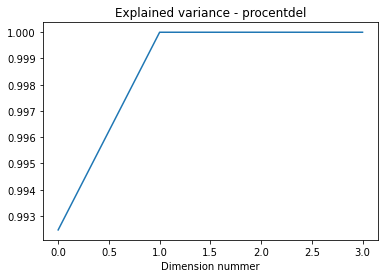

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x = testData.drop(columns=["category","main_category","deadline","launched","country"])
y = x['outcome']
x = x.drop(columns="outcome")
testData_red = pca.fit_transform(x,y)

#print(pca.components_)
print(pca.explained_variance_ratio_)

varience = pca.explained_variance_ratio_

plt.plot(np.cumsum(varience)/np.sum(varience))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')

In [13]:
def SuccesProcentForCol(col):
    Category_count = testData.groupby([col]).count()
    Category_count_Success = testData.where(testData.outcome==1).groupby([col]).count()

    Catagory_Success_Procent =Category_count.assign(cat_outcome=Category_count_Success.category/Category_count.category)

    return Catagory_Success_Procent.cat_outcome
    
    
    
print(SuccesProcentForCol('main_category'))
print()
print(SuccesProcentForCol('country'))



main_category
Art             0.448890
Comics          0.591415
Crafts          0.270530
Dance           0.654352
Design          0.415921
Fashion         0.282846
Film & Video    0.417882
Food            0.275914
Games           0.438905
Journalism      0.243973
Music           0.526299
Photography     0.341108
Publishing      0.347330
Technology      0.237854
Theater         0.637961
Name: cat_outcome, dtype: float64

country
AT    0.220619
AU    0.303809
BE    0.290631
CA    0.334196
CH    0.286810
DE    0.272701
DK    0.388769
ES    0.262680
FR    0.360317
GB    0.409690
HK    0.452830
IE    0.303075
IT    0.185310
JP    0.304348
LU    0.333333
MX    0.280652
NL    0.255910
NO    0.278351
NZ    0.351648
SE    0.337309
SG    0.392070
US    0.418193
Name: cat_outcome, dtype: float64


In [14]:
def PresenceProcentForCol(col):
    category_count = testData.groupby([col]).count()
    
    total_count = testData.count()
    
    Catagory_Success_Procent =Category_count.assign(cat_outcome=category_count/total_count)

    return Catagory_Success_Procent.cat_outcome


In [15]:
len(testData)

331465

[[ 4.56475621e-06  5.57395194e-04  9.99999845e-01  2.47289087e-07]
 [ 7.52665360e-03  9.99971519e-01 -5.57413763e-04  1.07638050e-06]]
0          1533.949776
1         30001.344876
2         45000.115661
3          4999.999793
5         50029.186837
              ...     
378654     6500.084855
378657     1500.086193
378658    15000.008833
378659    15000.109184
378660     2000.291849
Name: 0, Length: 331465, dtype: float64


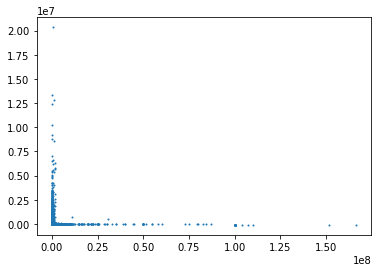

In [16]:
# Alternativ : Brug fit_transform eller transform direkte..
pcacom = pca.components_[:2,:]
print(pcacom)
X2proj = x @ pcacom.T
print(X2proj[0])

plt.scatter(X2proj[0], X2proj[1], s=1) # Læg mærke til standard afvigelserne..

In [17]:
def EncodeColToBinary(dataset,col):
    from sklearn.preprocessing import OneHotEncoder as OHEncoder
    onencoder = OHEncoder()

    cat_fac_encoded,cat_fac_decoder = pd.factorize(dataset[col])
    dataset[col+"_encoded"] = cat_fac_encoded

    cat_fac_encoded_vector=cat_fac_encoded.reshape(len(cat_fac_encoded),1)
    cat_fac_encode_matrix = onencoder.fit_transform(cat_fac_encoded_vector)

    
    for i in range(len(cat_fac_decoder)):
        dataset[col+"_"+cat_fac_decoder[i]] = cat_fac_encode_matrix.toarray()[:,i].astype(int)
    
    return dataset

In [18]:
X = testData.copy()
X = EncodeColToBinary(X,'main_category')
#X = EncodeColToBinary(X,'category')
X = EncodeColToBinary(X,'country')

X.columns
print(X.size)
print(len(testData))

16241785
331465
